In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [388]:
# train and validation dataset from X_train and Y_train

df_X_train = pd.read_csv('/content/X_train.csv', sep=';', parse_dates=['date'], decimal=',')
df_y_train = pd.read_csv('/content/Y_train.csv', sep=';', parse_dates=['date'], decimal=',')

In [389]:
df_X_train.shape

(8437, 114)

In [390]:
df_y_train.shape

(8437, 3)

In [391]:
df_all_train = pd.concat([df_X_train, df_y_train['y']], axis=1, sort=False)

In [392]:
df_all_train

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,683,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,0.000000,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.0,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.000000,20.391554,0.509713,216.851245,56.139906,1430.314968
1,683,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.000000,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,0.000000,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.0,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074385,69.943189,2.704237,292.934714,138.241134,0.000000,15.316564,2.526962,39.451960,7.172635,0.000000
2,683,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.000000,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.0,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.000000,12.774053,0.242973,35.226264,50.614383,5088.531900
3,683,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000000,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967498,216.926780,0.000000,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.0,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000000,17.904427,29.437773,5.591309,0.000000,2837.756051
4,683,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.000000,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,0.000000,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.0,NaN,0.247954,225.391633,4.649092,906.258984,456.569736,1.180266,2286.291490,297.074370,122.281449,-3.391917,214.612318,275.579690,0.0,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.73264,15.836277,1629.479264,59.613338,0.060753,4.878556,0.000000,14.081303,0.125393,5.872891,0.000000,51.311689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [393]:
df = df_all_train[df_all_train['key']==683]

In [394]:
df.head()

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,683,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,0.0,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.0,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.0,20.391554,0.509713,216.851245,56.139906,1430.314968
1,683,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.0,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,0.0,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.0,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074385,69.943189,2.704237,292.934714,138.241134,0.0,15.316564,2.526962,39.451960,7.172635,0.000000
2,683,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.0,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.0,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.0,12.774053,0.242973,35.226264,50.614383,5088.531900
3,683,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.0,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967498,216.926780,0.0,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.0,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.0,17.904427,29.437773,5.591309,0.000000,2837.756051
4,683,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.0,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,0.0,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.0,NaN,0.247954,225.391633,4.649092,906.258984,456.569736,1.180266,2286.291490,297.074370,122.281449,-3.391917,214.612318,275.579690,0.0,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.73264,15.836277,1629.479264,59.613338,0.060753,4.878556,0.0,14.081303,0.125393,5.872891,0.000000,51.311689


In [395]:
df.shape

(78, 115)

In [396]:
df.tail()

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
73,683,2018-02-01,0.000000,0.0,1.606342,0.695335,NaN,NaN,452.812724,12.346577,17.872240,3256.610600,3.867322,0.384000,5.956372,0.117962,111.580609,302.132193,1028.362339,66.232265,0.885712,559.919885,6.961194,59.006177,154.340215,0.000000,NaN,1.941888,393.024298,1.663895,254.113103,119.083232,0.13519,NaN,2.634977,410.208210,1.269320,22.664167,126.283776,0.000000,...,74.860227,11.243694,2871.571650,77.715857,3317.231375,512.315332,0.000000,NaN,86.306106,3217.949334,93.085263,1286.558830,459.353610,0.000000,2563.122268,4.662206,348.904880,144.990040,77.556739,105.507461,0.0,7.570104,32.266927,9.015043,0.822063,240.252644,444.191725,5956.448233,21.431854,2.097717,322.391905,1.211330,292.979950,138.111841,0.000000,39.779445,-5.957109,346.003773,18.626023,631.497575
74,683,2018-03-01,NaN,0.0,0.000000,12.215010,NaN,173.101452,322.967491,NaN,NaN,5666.162622,NaN,NaN,NaN,NaN,723.583278,1024.745667,1154.461035,NaN,77.483152,189.597284,0.339383,287.975317,58.354401,0.000000,NaN,4.537441,242.263436,0.000000,41.085475,6.029126,0.00000,NaN,55.342670,2.659026,0.000000,NaN,NaN,NaN,...,NaN,54.268037,-57.814282,4.268495,941.836481,43.288551,0.836423,NaN,278.482778,133.058700,45.366719,219.141688,648.755454,0.000000,4245.484390,7.969059,307.735456,26.332750,13308.107970,459.121317,0.0,NaN,0.083591,4675.355901,94.438633,0.020267,0.627916,5747.702641,NaN,0.000000,1.326371,0.000000,8.394695,14.004395,0.000000,-1.324024,0.107144,12.917084,0.000000,4491.328163
75,683,2018-04-01,0.000000,0.0,0.000000,0.000000,NaN,NaN,5470.393750,4046.737609,419.827259,5472.521426,NaN,1.422566,2806.564223,8.474557,0.657392,2.198715,1078.812141,NaN,0.000000,8.306391,0.000000,68.513570,4109.716555,0.000000,NaN,3.997398,920.934071,231.962235,949.397948,670.653543,0.00000,419.916121,314.607599,-13.212628,0.031201,330.058753,154.673066,0.323651,...,NaN,4.116150,4.186488,0.004193,1448.239060,4095.201054,0.000000,NaN,-49.246563,1699.701932,-26.389751,81.499207,34.265434,2.677916,4352.588066,2.994290,12.324420,2.659864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3722.053732,2418.948516,6726.744969,NaN,10.071323,1736.140399,33.448134,277.102525,210.631341,0.506808,23.057452,9.912008,96.991128,11.029601,4257.036901
76,683,2018-05-01,2.035722,0.0,0.032433,0.000000,241.881299,NaN,26.180384,94.188121,224.370446,6582.072428,NaN,71.049638,1.649140,6.789751,120.987594,119.671403,1558.910634,6.117838,-20.049068,66.492458,16.554861,56.571880,0.633584,0.601719,54.843549,65.608051,57.350715,9.790260,132.797988,33.885817,0.00000,NaN,25.584457,83.841191,14.914800,6164.180270,4280.547545,0.000000,...,NaN,0.354769,2.219767,4.781382,18.894062,28.569167,0.504255,0.000000,2.222693,5.681226,0.000000,302.344531,40.013237,0.000000,5315.783259,0.289259,13.014052,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.875559,208.240333,5887.239523,67.540466,76.987558,62.874765,93.397139,1283.256808,2325.353284,0.000000,55.256255,0.528185,112.796447,9.771873,4716.450361
77,683,2018-06-01,NaN,0.0,0.000000,0.000000,NaN,NaN,1113.490383,NaN,NaN,5633.430391,NaN,NaN,NaN,NaN,0.204604,1.732981,1372.907323,NaN,0.000000,4.087152,0.000000,128.587022,80.772114,0.000000,NaN,26.158593,72.561370,16.027221,66.538353,8.032097,0.00000,4.806240,0.292687,11.354237,0.000000,2821.533646,3159.177507,0.000000,...,0.787261,0.178510,126.532464,0.000000,297.181768,86.385572,0.000000,67.931827,-10.543066,236.821339,0.000000,935.881415,391.870657,0.761271,4391.081935,318.798478,667.494462,1.258753,10.171825,156.957493,0.0,NaN,0.717628,40.502439,0.000000,102.458000,118.768205,7511.424673,111.149141,0.355030,33.628373,7.591526,1836.061326,1442.779990,0.000000,34.949293,35.049214,2.517209,46.082637,4670.141375


In [397]:
df.isna().sum()

key     0
date    0
x1      7
x2      5
x3      4
       ..
x109    0
x110    5
x111    5
x112    5
y       0
Length: 115, dtype: int64

### Find a way of showing all the 112 columns here. pd.options hahah

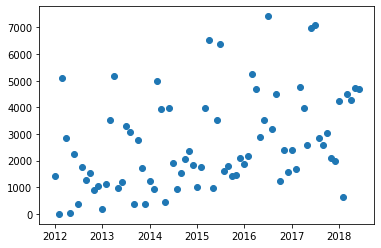

In [398]:
fig,ax = plt.subplots()
ax.scatter(df["date"],df["y"]);

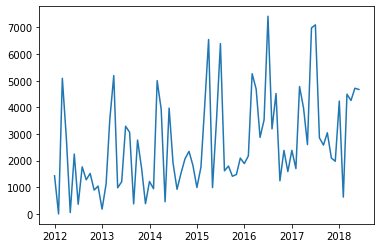

In [399]:
plt.plot(df.date, df.y)
plt.show()

In [400]:
df.head(30)

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,683,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,0.000000,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.000000,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.000000,20.391554,0.509713,216.851245,56.139906,1430.314968
1,683,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.000000,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,0.000000,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.000000,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.000000,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074385,69.943189,2.704237,292.934714,138.241134,0.000000,15.316564,2.526962,39.451960,7.172635,0.000000
2,683,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.000000,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.000000,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.000000,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.000000,12.774053,0.242973,35.226264,50.614383,5088.531900
3,683,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000000,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967498,216.926780,0.000000,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.000000,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.000000,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000000,17.904427,29.437773,5.591309,0.000000,2837.756051
4,683,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.000000,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,0.000000,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.000000,NaN,0.247954,225.391633,4.649092,906.258984,456.569736,1.180266,2286.291490,297.074370,122.281449,-3.391917,214.612318,275.579690,0.000000,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.732640,15.836277,1629.479264,59.613338,0.060753,4.878556,0.000000,14.081303,0.125393,5.872891,0.000000,51.311689
5,683,2012-06-01,0.000000,0.000000,0.000000,0.312674,NaN,NaN,399.96564

In [401]:
#sorting the values of the dataset in ascending order with respect to date of sale
df.sort_values(by = ["date"],inplace=True, ascending=True)
df.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,683,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,0.000000,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.000000,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.000000,20.391554,0.509713,216.851245,56.139906,1430.314968
1,683,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.000000,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,0.000000,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.000000,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.000000,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074385,69.943189,2.704237,292.934714,138.241134,0.000000,15.316564,2.526962,39.451960,7.172635,0.000000
2,683,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.000000,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.000000,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.000000,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.000000,12.774053,0.242973,35.226264,50.614383,5088.531900
3,683,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000000,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967498,216.926780,0.000000,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.000000,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.000000,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000000,17.904427,29.437773,5.591309,0.000000,2837.756051
4,683,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.000000,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,0.000000,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.000000,NaN,0.247954,225.391633,4.649092,906.258984,456.569736,1.180266,2286.291490,297.074370,122.281449,-3.391917,214.612318,275.579690,0.000000,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.732640,15.836277,1629.479264,59.613338,0.060753,4.878556,0.000000,14.081303,0.125393,5.872891,0.000000,51.311689
5,683,2012-06-01,0.000000,0.000000,0.000000,0.312674,NaN,NaN,399.96564

In [402]:
#this step is done to copy the original dataset into a variable for future use
df_new = df.copy()

In [403]:
df_new

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,683,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,0.000000,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.0,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.000000,20.391554,0.509713,216.851245,56.139906,1430.314968
1,683,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.00000,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,0.000000,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.000000,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074385,69.943189,2.704237,292.934714,138.241134,0.000000,15.316564,2.526962,39.451960,7.172635,0.000000
2,683,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.00000,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.000000,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.000000,12.774053,0.242973,35.226264,50.614383,5088.531900
3,683,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000000,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967498,216.926780,0.000000,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.000000,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000000,17.904427,29.437773,5.591309,0.000000,2837.756051
4,683,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.00000,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,0.000000,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.000000,NaN,0.247954,225.391633,4.649092,906.258984,456.569736,1.180266,2286.291490,297.074370,122.281449,-3.391917,214.612318,275.579690,0.0,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.732640,15.836277,1629.479264,59.613338,0.060753,4.878556,0.000000,14.081303,0.125393,5.872891,0.000000,51.311689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [404]:
#adding a few extra parameters to the dataframe and getting rid of the date-month-year format
#this step is important because the time data cannot be preprocessed in the abovedescribed format
"""df_new = df_new.drop('key', axis=1)
df_new["saleYear"] = df_new.date.dt.year
df_new["saleMonth"] = df_new.date.dt.month
df_new["saleDay"] = df_new.date.dt.day
df_new["saleDayOfYear"] = df_new.date.dt.dayofyear
df_new["year_and_dayOfYear"] = df_new["saleYear"].astype(str) + df_new["saleDayOfYear"].astype(str)
df_new.drop("date",axis=1, inplace=True)
"""

'df_new = df_new.drop(\'key\', axis=1)\ndf_new["saleYear"] = df_new.date.dt.year\ndf_new["saleMonth"] = df_new.date.dt.month\ndf_new["saleDay"] = df_new.date.dt.day\ndf_new["saleDayOfYear"] = df_new.date.dt.dayofyear\ndf_new["year_and_dayOfYear"] = df_new["saleYear"].astype(str) + df_new["saleDayOfYear"].astype(str)\ndf_new.drop("date",axis=1, inplace=True)\n'

In [405]:
df_new.drop("key",axis=1, inplace=True)
df_new.head()

,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,0.0,NaN,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.0,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.0,20.391554,0.509713,216.851245,56.139906,1430.314968
1,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.0,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,0.0,NaN,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.0,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074385,69.943189,2.704237,292.934714,138.241134,0.0,15.316564,2.526962,39.451960,7.172635,0.000000
2,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.0,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.0,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.0,12.774053,0.242973,35.226264,50.614383,5088.531900
3,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.0,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967498,216.926780,0.0,20.315637,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.0,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.0,17.904427,29.437773,5.591309,0.000000,2837.756051
4,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.0,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,0.0,NaN,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.0,NaN,0.247954,225.391633,4.649092,906.258984,456.569736,1.180266,2286.291490,297.074370,122.281449,-3.391917,214.612318,275.579690,0.0,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.73264,15.836277,1629.479264,59.613338,0.060753,4.878556,0.0,14.081303,0.125393,5.872891,0.000000,51.311689


In [406]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Columns: 114 entries, date to y
dtypes: datetime64[ns](1), float64(113)
memory usage: 70.1 KB


# add key number to the name of file 683

In [407]:
df_new.to_csv('train_new.csv',
              index = False)

In [408]:
# checking for missing values
df_new.isna().sum()

date    0
x1      7
x2      5
x3      4
x4      4
       ..
x109    0
x110    5
x111    5
x112    5
y       0
Length: 114, dtype: int64

In [409]:
for label,content in df_new.items():
    
    #in the new dataset , search for string data type cintents and convert them to category type
    
    if pd.api.types.is_string_dtype(content):
        df_new[label] = content.astype("category").cat.as_ordered()

In [410]:
for label,value in df_new.items():
    
    #in the dataset if any numeric data type value is null , fill it with the median of the column
    
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            df_new[label] = content.fillna(value.median())

In [411]:
#checking for leftover missing values
df_new.isna().sum()

date    0
x1      0
x2      0
x3      0
x4      0
       ..
x109    0
x110    0
x111    0
x112    0
y       0
Length: 114, dtype: int64

In [412]:
#checking for leftover missing values
df_new.isna().sum().sum()

0

# Modelling and hyperparameter tuning¶
### Here we will divide the given dataset into training and validation set and use grid search CV to fing the best parameters ad find out the cost function using RMSLE. After that we will use the generated model to predict prices on the test set and find out the accuracy of the model.

In [416]:
x = df_new.drop("y", axis=1)
x = x.drop('date', axis=1)

In [417]:
y = df_new["y"]
y

0     1430.314968
1        0.000000
2     5088.531900
3     2837.756051
4       51.311689
         ...     
73     631.497575
74    4491.328163
75    4257.036901
76    4716.450361
77    4670.141375
Name: y, Length: 78, dtype: float64

In [418]:
#fitting the dataset into the regression model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1)
model.fit(x , y);

In [419]:
model.score(x,y)

0.999710624709313

Our random forest regression model has showcased 95.6 percent accuracy on the original set. Now we split it into training and validation data.

In [420]:
df_new.tail(20)

,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
58,2016-11-01,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,4993.391789,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,243.097477,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,...,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,4489.529867,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,5149.469124,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,2382.521011,24.027076,2382.521011,2382.521011,2382.521011,2382.521011
59,2016-12-01,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,4459.702635,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,229.246970,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,...,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,4026.680580,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,4643.757669,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,1587.760915,-12.028390,1587.760915,1587.760915,1587.760915,1587.760915
60,2017-01-01,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,4649.523150,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,46.063387,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,...,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,4351.550614,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,4733.357600,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,2385.529867,5.038183,2385.529867,2385.529867,2385.529867,2385.529867
61,2017-02-01,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,4599.984910,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,112.581997,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,...,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,4250.692049,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048,1701.648048

In [421]:
df_new.shape

(78, 114)

In [426]:
df_new.drop('date', axis=1).iloc[-12:, :]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
66,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7634.998395,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,86.396222,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,...,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,6042.737438,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,5287.275990,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,7095.005600,18.564478,7095.005600,7095.005600,7095.005600,7095.005600
67,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,5236.951873,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,85.793552,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,...,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,4146.452011,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,5384.175110,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,2855.438152,15.598828,2855.438152,2855.438152,2855.438152,2855.438152
68,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,5132.039562,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,73.264532,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,...,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,4059.841317,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,5084.490128,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,2582.423620,15.498266,2582.423620,2582.423620,2582.423620,2582.423620
69,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,4977.306870,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,58.836726,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,...,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3839.096391,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954,3044.868954

In [425]:
df_new.drop('date', axis=1).iloc[:-12, :]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,3190.003651,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,-7.009597,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,...,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,2935.746468,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,2483.197938,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,1430.314968,20.391554,1430.314968,1430.314968,1430.314968,1430.314968
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2650.403762,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,182.522388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2269.404233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2588.661911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.316564,0.000000,0.000000,0.000000,0.000000
2,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,2737.479632,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,71.534699,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,...,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,2406.631651,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,3199.137392,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,5088.531900,12.774053,5088.531900,5088.531900,5088.531900,5088.531900
3,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,3492.642102,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,82.488252,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,...,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,3116.009696,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2334.295931,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,2837.756051,17.904427,2837.756051,2837.756051,2837.756051,2837.756051
4,51.311689,51.311689,51.311689,51.311689,51.3116

In [428]:
#validation set as described in the original problem from January 1, 2012 - April 30, 2012.

valid_set = df_new.drop('date', axis=1).iloc[-12:, :]

#anything other than the data of theyear 2012 falls in the training set.

train_set = df_new.drop('date', axis=1).iloc[:-12, :]

#splitting the training and validation data into trainable set and target

x_train, y_train = train_set.drop("y", axis=1), train_set.y
x_valid, y_valid = valid_set.drop("y", axis=1), valid_set.y

#### Change the error metrics to the given one

In [429]:
# creating rsmle function to return the root mean square log error

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# creating show_scores function to return the rmsle values

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Valid RSMLE": rmsle(y_valid, val_preds),
             "Training RSMLE": rmsle(y_train,train_preds)}
    return scores

In [430]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [431]:
show_scores(model)

{'Training RSMLE': 0.5007865265615139, 'Valid RSMLE': 0.12581720651714517}

### Here we can clearly see that our model is overfitting [underfitting] as it performs exceptinally on the training set when compared to validation set.
### Grid Search CV will be used to find the best hyperparameters . However , because of its exhaustive nature, it may take hours to run even on a powerful machine. Hence,in order to save time and space, we will first reduce the parameters using RandomizedSearchCV and then apply GridSearchCV.

# Delete Randomized as dataset is small

In [432]:
#making a grid of hyperparameters for RandomizedSearchCV

grid = {"n_estimators": np.arange(10,100,10),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples": [66]}

# creating a model of the RandomizedSearchCV by passing in the grid, the number of iterations(n_iter) and number of folds(cv)

gs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=grid,
                             n_iter = 10,
                             cv=5,
                             verbose=True)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 52 but got value 66

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 53 but got value 66

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: `max_samples` must be in range 1 to 53 but got value 66

  FitFailedWarning)
/usr/local/li

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [433]:
# extracting the best parameters based on random search
gs_model.best_params_

{'max_depth': None,
 'max_features': 1,
 'max_samples': 66,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 90}

In [434]:
show_scores(gs_model)

{'Training RSMLE': 0.8061164107926978, 'Valid RSMLE': 0.0876671048008804}

# Why this scores are 100x more than the scores above???

In [435]:
grid_2 = {"n_estimators": [40, 90],
          "max_depth": [1, 5, 10],
          "min_samples_split": [2, 4],
          "min_samples_leaf": [5, 10],
          "max_features": ["sqrt","auto"],
          "max_samples": [52]}

In [436]:
# preparing model for gridsearch CV by passing in the grid_2 and number of folds(cv).
# number of itertions will not be passed as the grid search CV tries every single combination.
gs_model_2 = GridSearchCV(RandomForestRegressor(n_jobs =-1,
                                                random_state=42),
                          param_grid = grid_2,
                          cv=5,
                          verbose=True)

gs_model_2.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=N

In [343]:
gs_model_2.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_samples': 52,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 40}

In [345]:
show_scores(gs_model_2)

{'Training RSMLE': 1.082502954211112, 'Valid RSMLE': 0.308408096646745}

As is clear from the above results, we were able to improve the performance of our model using grid search CV. We can further improve this by passing in more hyperparameters but that will require a significant amount of running time.

# Predictions on test data

In [447]:
df_all_test = pd.read_csv('/content/X_test.csv', sep=';', parse_dates=['date'], decimal=',')

In [448]:
df_test = df_all_test[df_all_test.key == 683]
df_test

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112
0,683,2018-07-01,0.000000,0.000000,0.397238,0.000000,NaN,NaN,119.936184,114.063630,183.479525,7599.854339,69.619165,0.462340,70.016970,6.499243,2080.584709,629.610635,798.069372,NaN,19.786062,5918.616119,35.902012,25.079849,218.895556,0.433570,NaN,49.771054,141.541094,3.972149,1.717963,0.249813,0.000000,0.000000,0.000000,1.386168,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.593574,0.000000,13.756439,0.147465,2.237439,1.096744,0.0,NaN,0.066562,2.138002,0.125860,70.304041,55.857679,0.671501,5976.264094,32.618685,2.862219,0.000000,27.013296,30.590863,0.000000,0.318069,0.014292,25.249954,0.000000,1.416416,7.701950,7279.604101,1.016117,0.019900,1.064945,0.000000,11762.888680,544.321043,0.000000,39.599762,7.289597,2895.006107,48.666357
1,683,2018-08-01,NaN,0.000000,0.000000,0.000000,74.832787,NaN,593.803092,NaN,NaN,7129.983016,NaN,NaN,NaN,NaN,95.954914,14.390141,961.357287,NaN,33.494129,20.048256,1.727713,40.379627,278.568592,0.000000,379.824359,0.000000,26.391928,1.084692,14.514143,3.707842,0.026478,NaN,2.122955,11.934203,0.038924,574.525316,42.995970,0.000000,...,NaN,NaN,NaN,NaN,NaN,472.740312,183.851784,0.0,95.115781,-2.336392,348.154269,0.735303,9410.310945,6905.818827,0.000000,5683.598011,4.091135,5081.726973,11.107717,10.268592,44.960559,0.529351,0.000000,42.367988,13.281237,0.255420,-1.709794,12.818468,3777.535755,0.948181,0.000000,-4.437491,0.141846,130.027455,84.134454,0.357027,33.098055,17.244210,97.633777,3.189301
2,683,2018-09-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,222.106715,7.926074,2.365509,3678.029954,NaN,1.158072,4.069820,0.000000,525.092910,67.252777,841.656146,224.161702,1.246150,76.995750,3.896790,32.560699,146.722536,0.154986,NaN,56.266567,96.698951,1.333487,3.499335,5.630862,0.000000,0.008676,0.235928,4.930272,0.537284,1.745145,10.275292,0.268869,...,0.313264,NaN,103.650234,33.812540,0.046914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4373.432383,4030.267060,0.000000,2838.761331,25.631407,5241.584063,84.529431,3033.674639,2765.063946,0.000000,NaN,14.818290,2654.609326,32.541473,80.419180,37.493150,5355.291239,53.169452,127.378575,42.879114,1.003184,NaN,NaN,NaN,8.638553,NaN,NaN,NaN
3,683,2018-10-01,1.532104,0.576041,0.000000,0.000000,52.540417,21.890773,59.588630,361.870894,20.197739,5274.149878,33.457377,2.838254,54.867813,2.142438,286.376808,340.997027,922.234490,108.356664,55.417867,666.833871,0.000000,44.605913,176.300592,0.000000,NaN,2.342705,36.281700,0.000000,0.364562,3.608975,0.000000,NaN,0.000000,2.957670,0.000000,58.611143,77.087262,0.000000,...,0.815112,13.302357,162.260640,294.477142,0.000000,2.617005,1.499883,0.0,NaN,0.058861,1.038145,0.026918,264.366003,7.481648,0.311486,4253.539961,2.579107,295.356669,10.524747,1274.979043,366.986198,0.000000,NaN,305.177692,707.745736,22.572099,1432.096995,849.138092,4923.854158,NaN,6.852297,196.748088,43.919361,102.735687,2.731286,0.000000,14.646718,2.719439,48.866957,0.267833
4,683,2018-11-01,0.000000,0.000000,0.000000,2.412814,19.021239,42.032333,1970.406869,6.444104,4.975536,4552.412721,NaN,0.102331,0.759610,0.000000,20625.351220,7100.112077,1105.512624,3229.309195,1302.158618,7848.897467,10.466621,256.098225,2565.327323,0.000000,1991.389016,38.048774,1117.778353,22.644475,123.799645,78.358941,0.000000,18.094593,3.803094,10.294551,0.000000,1933.862467,8103.020755,0.000000,...,0.000000,NaN,12.061952,305.461839,43.256803,867.922705,647.729937,0.0,NaN,-7.345425,392.535421,2.765869,59.423342,71.497892,0.000000,3461.994497,0.277202,49.202131,0.364718,63.998001,36.435154,0.000000,NaN,0.190193,56.798624,0.000000,18.123939,39.236618,5828.418017,1.624747,10.802692,17.802426,1.605068,71.384402,131.866917,0.000000,-7.336147,2.190175,43.717736,0.833

In [449]:
#function to preprocess the test data
def preprocess(df):
    #df.drop('key', axis=1, inplace=True)
    df["saleYear"] = df.date.dt.year
    df["saleMonth"] = df.date.dt.month
    df["saleDay"] = df.date.dt.day
    df["saleDayOfYear"] = df.date.dt.dayofyear
    #df["year_and_dayOfYear"] = df["saleYear"].astype(str) + df["saleDayOfYear"].astype(str)
    #df.drop("date",axis=1, inplace=True)
    for label,value in df.items():
        if pd.api.types.is_numeric_dtype(value):
            if pd.isnull(value).sum():
                df[label] = value.fillna(value.median())
        elif not pd.api.types.is_numeric_dtype(value):
            df[label] = pd.Categorical(value).codes+1
            
    return df

In [450]:
df_test = preprocess(df_test)
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,...,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,saleYear,saleMonth,saleDay,saleDayOfYear
0,683,1,0.000000,0.000000,0.397238,0.000000,35.780828,11.206099,119.936184,114.063630,183.479525,7599.854339,69.619165,0.462340,70.016970,6.499243,2080.584709,629.610635,798.069372,108.356664,19.786062,5918.616119,35.902012,25.079849,218.895556,0.433570,530.395050,49.771054,141.541094,3.972149,1.717963,0.249813,0.000000,0.000000,0.000000,1.386168,0.000000,0.000000,0.000000,0.000000,...,0.147465,2.237439,1.096744,0.0,95.115781,0.066562,2.138002,0.125860,70.304041,55.857679,0.671501,5976.264094,32.618685,2.862219,0.000000,27.013296,30.590863,0.000000,0.318069,0.014292,25.249954,0.000000,1.416416,7.701950,7279.604101,1.016117,0.019900,1.064945,0.000000,11762.888680,544.321043,0.000000,39.599762,7.289597,2895.006107,48.666357,2018,7,1,182
1,683,2,0.000000,0.000000,0.000000,0.000000,74.832787,11.206099,593.803092,99.392592,101.838632,7129.983016,20.132099,0.961248,40.318732,1.166922,95.954914,14.390141,961.357287,108.356664,33.494129,20.048256,1.727713,40.379627,278.568592,0.000000,379.824359,0.000000,26.391928,1.084692,14.514143,3.707842,0.026478,18.094593,2.122955,11.934203,0.038924,574.525316,42.995970,0.000000,...,13.113605,472.740312,183.851784,0.0,95.115781,-2.336392,348.154269,0.735303,9410.310945,6905.818827,0.000000,5683.598011,4.091135,5081.726973,11.107717,10.268592,44.960559,0.529351,0.000000,42.367988,13.281237,0.255420,-1.709794,12.818468,3777.535755,0.948181,0.000000,-4.437491,0.141846,130.027455,84.134454,0.357027,33.098055,17.244210,97.633777,3.189301,2018,8,1,213
2,683,3,0.000000,0.000000,0.000000,0.000000,35.780828,11.206099,222.106715,7.926074,2.365509,3678.029954,20.132099,1.158072,4.069820,0.000000,525.092910,67.252777,841.656146,224.161702,1.246150,76.995750,3.896790,32.560699,146.722536,0.154986,530.395050,56.266567,96.698951,1.333487,3.499335,5.630862,0.000000,0.008676,0.235928,4.930272,0.537284,1.745145,10.275292,0.268869,...,0.046914,161.379673,32.655569,0.0,95.115781,0.066562,148.169122,0.125860,4373.432383,4030.267060,0.000000,2838.761331,25.631407,5241.584063,84.529431,3033.674639,2765.063946,0.000000,0.159034,14.818290,2654.609326,32.541473,80.419180,37.493150,5355.291239,53.169452,127.378575,42.879114,1.003184,130.027455,131.866917,0.000000,8.638553,1.045168,48.866957,3.119849,2018,9,1,244
3,683,4,1.532104,0.576041,0.000000,0.000000,52.540417,21.890773,59.588630,361.870894,20.197739,5274.149878,33.457377,2.838254,54.867813,2.142438,286.376808,340.997027,922.234490,108.356664,55.417867,666.833871,0.000000,44.605913,176.300592,0.000000,530.395050,2.342705,36.281700,0.000000,0.364562,3.608975,0.000000,18.094593,0.000000,2.957670,0.000000,58.611143,77.087262,0.000000,...,0.000000,2.617005,1.499883,0.0,95.115781,0.058861,1.038145,0.026918,264.366003,7.481648,0.311486,4253.539961,2.579107,295.356669,10.524747,1274.979043,366.986198,0.000000,0.159034,305.177692,707.745736,22.572099,1432.096995,849.138092,4923.854158,3.639414,6.852297,196.748088,43.919361,102.735687,2.731286,0.000000,14.646718,2.719439,48.866957,0.267833,2018,10,1,274
4,683,5,0.000000,0.000000,0.000000,2.412814,19.021239,42.032333,1970.406869,6.444104,4.975536,4552.412721,20.132099,0.102331,0.759610,0.000000,20625.351220,7100.112077,1105.512624,3229.309195,1302.158618,7848.897467,10.466621,256.098225,2565.327323,0.000000,1991.389016,38.048774,1117.778353,22.644475,123.799645,78.358941,0.000000,18.094593,3.803094,10.294551,0.000000,1933.862467,8103.020755,0.000000,...,43.256803,867.922705,647.729937,0.0,95.115781,-7.345425,392.535421,2.765869,59.423342,71.497892,0.000000,3461.994497,0.277202,49.202131,0.364718,63.998001,36.435154,0.000000,0.159034,0.190193,56.798624,0.000000,18.123939,39.236618

In [451]:
df_test.isna().sum().sum()

0

In [452]:
#predict the price of product 683 on test dataset
test_preds = gs_model_2.predict(df_test)

ValueError: ignored

In [358]:
df_preds = pd.DataFrame()
df_preds["year_and_dayOfYear"] = df_test["year_and_dayOfYear"]
df_preds["y"] = test_preds
df_preds

,year_and_dayOfYear,y
0,1,5035.459136
1,2,5088.361627
2,3,2162.308486
3,4,2998.765759
4,5,2685.481108
5,6,3283.721030
6,7,3881.747976
7,10,2439.167490
8,11,4318.121378
9,12,5082.248186


In [283]:
df_new["year_and_dayOfYear"] = df_new["saleYear"].astype(str) + df_new["saleDayOfYear"].astype(str)
df_new

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y,saleYear,saleMonth,saleDay,saleDayOfYear,year_and_dayOfYear
0,1,1,1,1,1,1,1,1,1,3190.003651,1,1,1,1,1,1,1,1,1,1,1,-7.009597,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2935.746468,1,1,1,1,1,1,1,1,1,1,1,1,2483.197938,1,1,1,1,1,1,1,20.391554,1,1,1,1430.314968,2012,1,1,1,20121
1,32,32,32,32,32,32,32,32,32,2650.403762,32,32,32,32,32,32,32,32,32,32,32,182.522388,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,2269.404233,32,32,32,32,32,32,32,32,32,32,32,32,2588.661911,32,32,32,32,32,32,32,15.316564,32,32,32,0.000000,2012,2,1,32,201232
2,61,61,61,61,61,61,61,61,61,2737.479632,61,61,61,61,61,61,61,61,61,61,61,71.534699,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,2406.631651,61,61,61,61,61,61,61,61,61,61,61,61,3199.137392,61,61,61,61,61,61,61,12.774053,61,61,61,5088.531900,2012,3,1,61,201261
3,92,92,92,92,92,92,92,92,92,3492.642102,92,92,92,92,92,92,92,92,92,92,92,82.488252,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,3116.009696,92,92,92,92,92,92,92,92,92,92,92,92,2334.295931,92,92,92,92,92,92,92,17.904427,92,92,92,2837.756051,2012,4,1,92,201292
4,122,122,122,122,122,122,122,122,122,2591.599732,122,122,122,122,122,122,122,122,122,122,122,74.886927,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,2286.291490,122,122,122,122,122,122,122,122,122,122,122,122,3669.944623,122,122,122,122,122,122,122,14.081303,122,122,122,51.311689,2012,5,1,122,2012122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,32,32,32,32,32,32,32,32,32,3256.610600,32,32,32,32,32,32,32,32,32,32,32,59.006177,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,2563.122268,32,32,32,32,32,32,32,32,32,32,32,32,5956.448233,32,32,32,32,32,32,32,39.779445,32,32,32,631.497575,2018,2,1,32,201832
74,60,60,60,60,60,60,60,60,60,5666.162622,60,60,60,60,60,60,60,60,60,60,60,287.975317,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,4245.484390,60,60,60,60,60,60,60,60,60,60,60,60,5747.702641,60,60,60,60,60,60,60,-1.324024,60,60,60,4491.328163,2018,3,1,60,201860
75,91,91,91,91,91,91,91,91,91,5472.521426,91,91,91,91,91,91,91,91,91,91,91,68.513570,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,4352.588066,91,91,91,91,91,91,91,91,91,91,91,91,6726.744969,91,91,91,91,91,91,91,23.057452,91,91,91,4257.036901,2018,4,1,91,201891
76,121,121,121,121,121,121,121,121,121,6582.072428,121,121,121,121,121,121,121,121,121,121,121,56.571880,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,5315.783259,121,121,121,121,121,121,121,121,121,121,121,121,5887.239523,121,121,121,121,121,121,121,55.256255,121,121,121,4716.450361,2018,5,1,121,2018121


In [ ]:
#[''.join(i) for i in zip(df_new["saleYear"].map(str),df_new["saleDayOfYear"])]

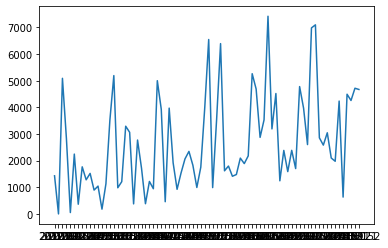

In [284]:
plt.plot(df_new.year_and_dayOfYear, df_new.y)
plt.show()


AttributeError: ignored

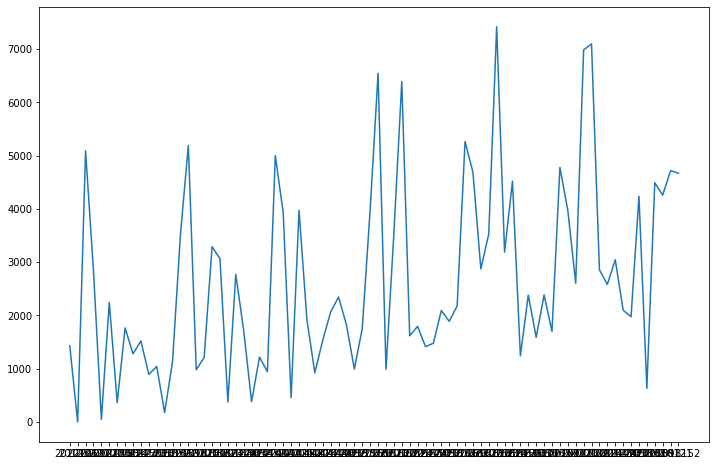

In [285]:
#y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(12,8))
plt.plot(df_new.year_and_dayOfYear, df_new['y'], label='Train')
plt.plot(df_preds.year_and_dayOfYear, df_preds['y'], label='Pred')
#plt.plot(y_hat.index,y_hat['naive'], label='Forecast')
plt.legend(loc='best')
plt.title("Forecasting")
plt.show()

In [260]:
plt.plot(df_new.year_and_dayOfYear, df_new.y)
plt.show()

0     1430.314968
1        0.000000
2     5088.531900
3     2837.756051
4       51.311689
         ...     
73     631.497575
74    4491.328163
75    4257.036901
76    4716.450361
77    4670.141375
Name: y, Length: 78, dtype: float64

In [440]:
df_preds

,year_and_dayOfYear,y
0,1,5035.459136
1,2,5088.361627
2,3,2162.308486
3,4,2998.765759
4,5,2685.481108
5,6,3283.721030
6,7,3881.747976
7,10,2439.167490
8,11,4318.121378
9,12,5082.248186


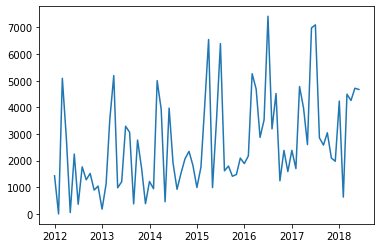

In [439]:
plt.plot(df_new['date'], df_new['y'], label='Train')

In [441]:
df_preds

,year_and_dayOfYear,y
0,1,5035.459136
1,2,5088.361627
2,3,2162.308486
3,4,2998.765759
4,5,2685.481108
5,6,3283.721030
6,7,3881.747976
7,10,2439.167490
8,11,4318.121378
9,12,5082.248186


In [446]:
df_new_viz = df_new.loc[:, ['date', 'y']]
df_new_viz

,date,y
0,2012-01-01,1430.314968
1,2012-02-01,0.000000
2,2012-03-01,5088.531900
3,2012-04-01,2837.756051
4,2012-05-01,51.311689
...,...,...
73,2018-02-01,631.497575
74,2018-03-01,4491.328163
75,2018-04-01,4257.036901
76,2018-05-01,4716.450361


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
data = pd.read_csv("/content/all.xls")

In [ ]:
first_product = data[data['key']==683]

In [ ]:
first_product.shape

(90, 116)

In [ ]:
first_product.head()


,Unnamed: 0,key,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
0,0,683,2012-01-01,0.793085,0.000000,0.690346,0.000000,NaN,NaN,502.893893,10235.637780,1221.445737,3190.003651,NaN,-28.651684,1980.637239,136.621699,299.643323,133.973307,NaN,NaN,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,NaN,4.434880,144.889458,58.435359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.519402,13.202909,...,NaN,15.623353,954.519173,34.305793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2935.746468,NaN,NaN,NaN,1.860910,5.634960,0.0,NaN,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,NaN,0.053509,120.669814,0.955509,616.883023,200.144478,0.0,20.391554,0.509713,216.851245,56.139906,1430.314968
1,1,683,2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,NaN,72.833160,88.793012,31.360328,2650.403762,NaN,0.000000,15.162247,0.000000,11722.413830,1440.290962,NaN,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.0,NaN,3.807971,214.180266,0.000000,37.871432,57.424344,...,NaN,2.122137,59.032868,0.000000,43.852976,29.679820,0.0,NaN,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,NaN,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,NaN,112.074386,69.943189,2.704237,292.934714,138.241134,0.0,15.316564,2.526962,39.451960,7.172635,0.000000
2,2,683,2012-03-01,0.000000,0.000000,0.000000,0.672651,NaN,NaN,880.917406,553.998042,518.008231,2737.479632,NaN,-6.347258,290.256466,2.617234,7676.235559,2442.891474,NaN,NaN,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,NaN,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.0,1349.949992,-0.804235,5583.822878,73.588569,NaN,NaN,...,NaN,0.955845,28.366982,-0.874112,80.014693,171.031154,0.0,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,NaN,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,NaN,0.998247,273.213135,0.000000,92.264811,100.972356,0.0,12.774053,0.242973,35.226264,50.614383,5088.531900
3,3,683,2012-04-01,0.000000,0.000000,0.000000,0.022906,NaN,6.711943,150.778812,11.951856,11.360498,3492.642102,0.0,2.353750,2.272131,0.000000,1.760293,0.429605,NaN,NaN,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,NaN,1.305207,66.564346,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.967497,216.926780,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.0,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,NaN,182.047997,18.272077,-0.357520,5.272196,49.725924,0.0,17.904427,29.437773,5.591309,0.000000,2837.756051
4,4,683,2012-05-01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5116.833341,114.048014,49.435797,2591.599732,NaN,303.912998,12.975439,41.586061,45.244724,8.442525,NaN,NaN,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,NaN,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.0,NaN,0.574922,187.914636,0.000000,6.119258,0.398433,...,NaN,1.509355,0.430600,0.000000,266.095362,1.470307,0.0,NaN,0.247954,225.391633,4.649092,906.258983,456.569736,1.180266,2286.291490,297.074370,122.281448,-3.391917,214.612318,275.579690,0.0,NaN,-0.908321,-13.563430,26.618824,8491.780101,395.686477,3669.944623,379.73264,15.836277,1629.479264,59.613338,0.060753,4.878556,0.0,14.081303,0.125393,5.872891,0.000000,51.311689


In [ ]:
"""first_product_columns_reduced = first_product.copy()

for col in first_product.columns:
  if first_product[col].isnull().sum() > len(first_product[col])/10:
    first_product_columns_reduced.drop(col)"""

KeyError: ignored

In [ ]:
#first_product_nan_less_than_10_percent = first_product.iloc[:, :-1]

In [ ]:
first_product_interpolated = first_product.iloc[:, :-1].interpolate()

In [ ]:
first_product_without_nan = first_product_interpolated.fillna(method='bfill')

In [ ]:
first_product_without_nan.isnull().sum().sum()

0

In [ ]:
useless_columns_dropped = first_product_without_nan.iloc[:, 2:]

In [ ]:
first_product_eda = pd.concat([useless_columns_dropped, pd.DataFrame(first_product.iloc[:,-1])], axis = 1).set_index('date')

In [ ]:
first_product_eda_zero_replaced = first_product_eda.replace(0, 0.000001)
first_product_eda_zero_replaced

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.793085,0.000001,0.690346,0.000001,362.021309,6.711943,502.893893,10235.637780,1221.445737,3190.003651,0.000001,-28.651684,1980.637239,136.621699,299.643323,133.973307,246.870966,674.974996,4.369916,265.896065,0.000001,-7.009597,196.752932,0.000001,91.252133,4.434880,144.889458,58.435359,138.650804,267.946614,0.000001,1349.949992,3.807971,214.180266,0.000001,56.519402,13.202909,0.000001,20.315637,0.964511,...,1419.233414,15.623353,954.519173,34.305793,43.852976,29.679820,0.000001,0.254988,0.000001,7.979666,0.373967,43.736220,58.752857,0.000001,2935.746468,2.596695,100.947424,0.000001,1.860910,5.634960,0.000001,186.568241,0.252966,2.374128,0.000001,22.850259,114.651122,2483.197938,379.732640,0.053509,120.669814,0.955509,616.883023,200.144478,0.000001,20.391554,0.509713,216.851245,56.139906,1430.314968
2012-02-01,0.000001,0.000686,0.590133,0.000001,362.021309,6.711943,72.833160,88.793012,31.360328,2650.403762,0.000001,0.000001,15.162247,0.000001,11722.413830,1440.290962,246.870966,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000001,91.252133,0.000001,30.849195,1.320652,138.650804,267.946614,0.000001,1349.949992,3.807971,214.180266,0.000001,37.871432,57.424344,0.000001,20.315637,3.337018,...,1419.233414,2.122137,59.032868,0.000001,43.852976,29.679820,0.000001,0.254988,0.000001,7.979666,0.373967,43.736220,58.752857,0.000001,2269.404233,2.596695,100.947424,0.000001,72.223545,13.151133,0.000001,186.568241,0.519628,20.318062,0.000001,85.488369,210.179587,2588.661911,379.732640,112.074386,69.943189,2.704237,292.934714,138.241134,0.000001,15.316564,2.526962,39.451960,7.172635,0.000001
2012-03-01,0.000001,0.000001,0.000001,0.672651,311.558651,6.711943,880.917406,553.998042,518.008231,2737.479632,0.000001,-6.347258,290.256466,2.617234,7676.235559,2442.891474,246.870966,506.231247,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,130.891729,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.000001,1349.949992,-0.804235,5583.822878,73.588569,77.919465,137.175562,0.000001,20.315637,1.823901,...,1419.233414,0.955845,28.366982,-0.874112,80.014693,171.031154,0.000001,0.254988,3.202027,174.340068,0.000001,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.000001,186.568241,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,379.732640,0.998247,273.213135,0.000001,92.264811,100.972356,0.000001,12.774053,0.242973,35.226264,50.614383,5088.531900
2012-04-01,0.000001,0.000001,0.000001,0.022906,261.095993,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000001,2.353750,2.272131,0.000001,1.760293,0.429605,246.870966,337.487498,9.421156,7.498595,0.000001,82.488252,7.487167,0.000001,170.531325,1.305207,66.564346,0.000001,5714.988383,1511.377797,0.000001,901.163836,-0.114656,2885.868757,36.794284,117.967497,216.926780,0.000001,20.315637,0.310783,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.000001,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000001,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.000001,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,379.732640,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000001,17.904427,29.437773,5.591309,0.000001,2837.756051
2012-05-01,0.000001,0.000001,0.000001,0.000001,210.633335,167.945052,5116.833341,114.048014,49.435797,2591.599732,475.080939,303.912998,12.975439,41.586061,45.244724,8.442525,246.870966,168.743749,0.000001,30.324494,0.000001,74.886927,3664.337211,0.552216,210.170921,-85.955052,2233.384744,16

In [ ]:
#first_product_eda.to_csv('first_product.csv')
first_product_eda

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.793085,0.000000,0.690346,0.000000,362.021309,6.711943,502.893893,10235.637780,1221.445737,3190.003651,0.000000,-28.651684,1980.637239,136.621699,299.643323,133.973307,246.870966,674.974996,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,91.252133,4.434880,144.889458,58.435359,138.650804,267.946614,0.000000,1349.949992,3.807971,214.180266,0.000000,56.519402,13.202909,0.0,20.315637,0.964511,...,1419.233414,15.623353,954.519173,34.305793,43.852976,29.679820,0.0,0.254988,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2935.746468,2.596695,100.947424,0.000000,1.860910,5.634960,0.0,186.568241,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,379.732640,0.053509,120.669814,0.955509,616.883023,200.144478,0.000000,20.391554,0.509713,216.851245,56.139906,1430.314968
2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,6.711943,72.833160,88.793012,31.360328,2650.403762,0.000000,0.000000,15.162247,0.000000,11722.413830,1440.290962,246.870966,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.000000,1349.949992,3.807971,214.180266,0.000000,37.871432,57.424344,0.0,20.315637,3.337018,...,1419.233414,2.122137,59.032868,0.000000,43.852976,29.679820,0.0,0.254988,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,186.568241,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,379.732640,112.074386,69.943189,2.704237,292.934714,138.241134,0.000000,15.316564,2.526962,39.451960,7.172635,0.000000
2012-03-01,0.000000,0.000000,0.000000,0.672651,311.558651,6.711943,880.917406,553.998042,518.008231,2737.479632,0.000000,-6.347258,290.256466,2.617234,7676.235559,2442.891474,246.870966,506.231247,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,130.891729,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.000000,1349.949992,-0.804235,5583.822878,73.588569,77.919465,137.175562,0.0,20.315637,1.823901,...,1419.233414,0.955845,28.366982,-0.874112,80.014693,171.031154,0.0,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,186.568241,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,379.732640,0.998247,273.213135,0.000000,92.264811,100.972356,0.000000,12.774053,0.242973,35.226264,50.614383,5088.531900
2012-04-01,0.000000,0.000000,0.000000,0.022906,261.095993,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000000,2.353750,2.272131,0.000000,1.760293,0.429605,246.870966,337.487498,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,170.531325,1.305207,66.564346,0.000000,5714.988383,1511.377797,0.000000,901.163836,-0.114656,2885.868757,36.794284,117.967497,216.926780,0.0,20.315637,0.310783,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.0,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,379.732640,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000000,17.904427,29.437773,5.591309,0.000000,2837.756051
2012-05-01,0.000000,0.000000,0.000000,0.000000,210.633335,167.945052,5116.833341,114.048014,49.435797,2591.599732,475.080939,303.912998,12.975439,41.586061,45.244724,8.442525,246.870966,168.743749,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,210.170921,-85.955052,2233.384744,162.301292,216.939475,142.173671,0.000000,452.377680,0.574922,

# Differencing

In [ ]:
data_first_order_diff = first_product_eda[first_product_eda.columns].diff()
data_first_order_diff

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,-0.793085,0.000686,-0.100213,0.000000,0.000000,0.000000,-430.060733,-10146.844768,-1190.085409,-539.599889,0.000000,28.651684,-1965.474992,-136.621699,11422.770507,1306.317655,0.000000,0.000000,-4.772034,2526.015374,36.794284,189.531984,-102.587329,0.000000,0.000000,-4.434880,-114.040263,-57.114707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.647970,44.221435,0.0,0.000000,2.372507,...,0.000000,-13.501216,-895.486305,-34.305793,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-666.342235,0.000000,0.000000,0.000000,70.362636,7.516173,0.0,0.000000,0.266662,17.943934,0.000000,62.638110,95.528465,105.463973,0.000000,112.020877,-50.726625,1.748729,-323.948309,-61.903344,0.000000,-5.074990,2.017249,-177.399285,-48.967271,-1430.314968
2012-03-01,0.000000,-0.000686,-0.590133,0.672651,-50.462658,0.000000,808.084246,465.205030,486.647903,87.075870,0.000000,-6.347258,275.094219,2.617234,-4046.178271,1002.600512,0.000000,-168.743749,-56.901251,-2539.163934,-11.114691,-110.987689,423.327054,1.587617,39.639596,309.109919,107.545349,8.160827,11074.386486,2612.635310,0.000000,0.000000,-4.612206,5369.642612,73.588569,40.048033,79.751218,0.0,0.000000,-1.513117,...,0.000000,-1.166292,-30.665886,-0.874112,36.161716,141.351333,0.0,0.000000,3.202027,166.360403,-0.373967,221.405538,165.402506,1.380692,137.227418,176.615815,635.985267,4.502811,-65.137375,-0.682643,0.0,0.000000,-0.261074,-14.970197,0.983134,169.471525,-51.600517,610.475481,0.000000,-111.076139,203.269945,-2.704237,-200.669902,-37.268778,0.000000,-2.542511,-2.283989,-4.225696,43.441748,5088.531900
2012-04-01,0.000000,0.000000,0.000000,-0.649745,-50.462658,0.000000,-730.138594,-542.046186,-506.647733,755.162470,0.000000,8.701009,-287.984335,-2.617234,-7674.475266,-2442.461869,0.000000,-168.743749,66.724524,-245.248910,-25.679593,10.953553,-510.005491,-1.587617,39.639596,-307.804712,-71.830199,-9.481479,-5498.048907,-1369.204127,0.000000,-448.786156,0.689579,-2697.954121,-36.794284,40.048033,79.751218,0.0,0.000000,-1.513117,...,0.000000,-1.487709,2596.280318,4.606131,-49.413579,383.696134,0.0,126.955273,40.879872,-83.635505,211.316371,-126.691394,-103.410332,-1.380692,709.378045,-180.489795,-441.483772,-3.407993,270.368059,69.772598,0.0,0.000000,5.037512,-112.776080,4.326447,394.793773,150.531347,-864.841461,0.000000,181.049750,-254.941057,-0.357520,-86.992616,-51.246432,0.000000,5.130373,29.194800,-29.634955,-50.614383,-2250.775849
2012-05-01,0.000000,0.000000,0.000000,-0.022906,-50.462658,161.233110,4966.054529,102.096158,38.075299,-901.042370,475.080939,301.559247,10.703308,41.586061,43.484431,8.012921,0.000000,-168.743749,-9.421156,22.825899,0.000000,-7.601324,3656.850044,0.552216,39.639596,-87.260259,2166.820398,162.301292,-5498.048907,-1369.204127,0.000000,-448.786156,0.689579,-2697.954121,-36.794284,-111.848239,-216.528347,0.0,3.357797,3.381553,...,-344.650535,2.041218,-2624.216700,-3.732019,235.494248,-553.256981,0.0,116.277486,-43.833944,134.687069,-206.667279,767.808619,335.824705,1.180266,-829.718206,298.351654,-173.167471,-4.486735,-62.841912,193.338602,0.0,-30.876431,-6.204388,93.864785,21.309243,7842.026434,86.576060,1335.648692,0.000000,-166.211720,1611.207187,59.970858,-5

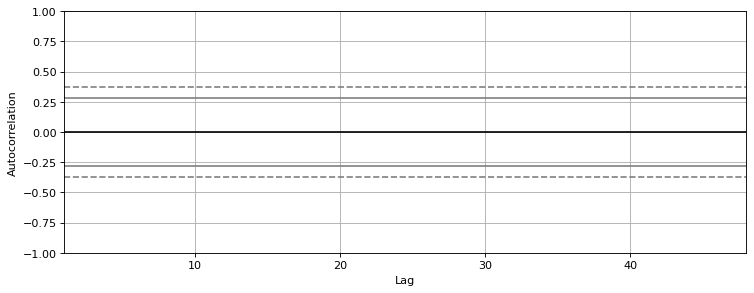

In [ ]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data_first_order_diff.iloc[:78, :].loc['2012-01': '2016-01', 'y']);

In [ ]:
first_product_train_validation = first_product_eda.iloc[:78, :]
first_product_test = first_product_eda.iloc[78:, :]

In [ ]:
first_product_train_validation

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.793085,0.000000,0.690346,0.000000,362.021309,6.711943,502.893893,10235.637780,1221.445737,3190.003651,0.000000,-28.651684,1980.637239,136.621699,299.643323,133.973307,246.870966,674.974996,4.369916,265.896065,0.000000,-7.009597,196.752932,0.000000,91.252133,4.434880,144.889458,58.435359,138.650804,267.946614,0.00000,1349.949992,3.807971,214.180266,0.000000,56.519402,13.202909,0.000000,20.315637,0.964511,...,1419.233414,15.623353,954.519173,34.305793,43.852976,29.679820,0.000000,0.254988,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2935.746468,2.596695,100.947424,0.000000,1.860910,5.634960,0.0,186.568241,0.252966,2.374128,0.000000,22.850259,114.651122,2483.197938,379.732640,0.053509,120.669814,0.955509,616.883023,200.144478,0.000000,20.391554,0.509713,216.851245,56.139906,1430.314968
2012-02-01,0.000000,0.000686,0.590133,0.000000,362.021309,6.711943,72.833160,88.793012,31.360328,2650.403762,0.000000,0.000000,15.162247,0.000000,11722.413830,1440.290962,246.870966,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000000,91.252133,0.000000,30.849195,1.320652,138.650804,267.946614,0.00000,1349.949992,3.807971,214.180266,0.000000,37.871432,57.424344,0.000000,20.315637,3.337018,...,1419.233414,2.122137,59.032868,0.000000,43.852976,29.679820,0.000000,0.254988,0.000000,7.979666,0.373967,43.736220,58.752857,0.000000,2269.404233,2.596695,100.947424,0.000000,72.223545,13.151133,0.0,186.568241,0.519628,20.318062,0.000000,85.488369,210.179587,2588.661911,379.732640,112.074386,69.943189,2.704237,292.934714,138.241134,0.000000,15.316564,2.526962,39.451960,7.172635,0.000000
2012-03-01,0.000000,0.000000,0.000000,0.672651,311.558651,6.711943,880.917406,553.998042,518.008231,2737.479632,0.000000,-6.347258,290.256466,2.617234,7676.235559,2442.891474,246.870966,506.231247,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,130.891729,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.00000,1349.949992,-0.804235,5583.822878,73.588569,77.919465,137.175562,0.000000,20.315637,1.823901,...,1419.233414,0.955845,28.366982,-0.874112,80.014693,171.031154,0.000000,0.254988,3.202027,174.340068,0.000000,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.0,186.568241,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,379.732640,0.998247,273.213135,0.000000,92.264811,100.972356,0.000000,12.774053,0.242973,35.226264,50.614383,5088.531900
2012-04-01,0.000000,0.000000,0.000000,0.022906,261.095993,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000000,2.353750,2.272131,0.000000,1.760293,0.429605,246.870966,337.487498,9.421156,7.498595,0.000000,82.488252,7.487167,0.000000,170.531325,1.305207,66.564346,0.000000,5714.988383,1511.377797,0.00000,901.163836,-0.114656,2885.868757,36.794284,117.967497,216.926780,0.000000,20.315637,0.310783,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.000000,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000000,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.0,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,379.732640,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000000,17.904427,29.437773,5.591309,0.000000,2837.756051
2012-05-01,0.000000,0.000000,0.000000,0.000000,210.633335,167.945052,5116.833341,114.048014,49.435797,2591.599732,475.080939,303.912998,12.975439,41.586061,45.244724,8.442525,246.870966,168.743749,0.000000,30.324494,0.000000,74.886927,3664.337211,0.552216,210.170921,-85.955052,2233.384744,162.301292,216.939475,142.

In [ ]:
first_product_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,0.000000,0.000000,0.397238,0.000000,130.515624,86.695350,119.936184,114.063630,183.479525,7599.854339,69.619165,0.462340,70.016970,6.499243,2080.584709,629.610635,798.069372,115.139770,19.786062,5918.616119,35.902012,25.079849,218.895556,0.433570,271.497422,49.771054,141.541094,3.972149,1.717963,0.249813,0.000000,0.000000,0.000000,1.386168,0.000000,0.000000,0.000000,0.000000,204.396394,7.125221,...,1.593574,0.000000,13.756439,0.147465,2.237439,1.096744,0.0,81.523804,0.066562,2.138002,0.125860,70.304041,55.857679,0.671501,5976.264094,32.618685,2.862219,0.000000,27.013296,30.590863,0.000000,0.318069,0.014292,25.249954,0.000000,1.416416,7.701950,7279.604101,1.016117,0.019900,1.064945,0.000000,11762.888680,544.321043,0.000000,39.599762,7.289597,2895.006107,48.666357,NaN
2018-08-01,0.000000,0.000000,0.000000,0.000000,74.832787,65.093824,593.803092,60.994852,92.922517,7129.983016,57.565235,0.810206,37.043395,3.249622,95.954914,14.390141,961.357287,169.650736,33.494129,20.048256,1.727713,40.379627,278.568592,0.000000,379.824359,0.000000,26.391928,1.084692,14.514143,3.707842,0.026478,0.004338,2.122955,11.934203,0.038924,574.525316,42.995970,0.000000,398.785202,-5.160594,...,5.496502,51.825117,23.784489,0.097189,472.740312,183.851784,0.0,95.115781,-2.336392,348.154269,0.735303,9410.310945,6905.818827,0.000000,5683.598011,4.091135,5081.726973,11.107717,10.268592,44.960559,0.529351,0.000000,42.367988,13.281237,0.255420,-1.709794,12.818468,3777.535755,0.948181,0.000000,-4.437491,0.141846,130.027455,84.134454,0.357027,33.098055,17.244210,97.633777,3.189301,NaN
2018-09-01,0.000000,0.000000,0.000000,0.000000,63.686602,43.492298,222.106715,7.926074,2.365509,3678.029954,45.511306,1.158072,4.069820,0.000000,525.092910,67.252777,841.656146,224.161702,1.246150,76.995750,3.896790,32.560699,146.722536,0.154986,917.012578,56.266567,96.698951,1.333487,3.499335,5.630862,0.000000,0.008676,0.235928,4.930272,0.537284,1.745145,10.275292,0.268869,205.185907,3.215455,...,9.399429,103.650234,33.812540,0.046914,237.678658,92.675833,0.0,457.113340,-1.138766,174.596207,0.381110,4373.432383,4030.267060,0.000000,2838.761331,25.631407,5241.584063,84.529431,3033.674639,2765.063946,0.000000,0.000000,14.818290,2654.609326,32.541473,80.419180,37.493150,5355.291239,53.169452,127.378575,42.879114,1.003184,116.381571,43.432870,0.178514,8.638553,9.981824,73.250367,1.728567,NaN
2018-10-01,1.532104,0.576041,0.000000,0.000000,52.540417,21.890773,59.588630,361.870895,20.197739,5274.149878,33.457377,2.838254,54.867813,2.142438,286.376808,340.997027,922.234490,108.356664,55.417867,666.833871,0.000000,44.605913,176.300592,0.000000,1454.200797,2.342705,36.281700,0.000000,0.364562,3.608975,0.000000,9.051634,0.000000,2.957670,0.000000,58.611143,77.087262,0.000000,11.586612,0.000000,...,13.302357,162.260640,294.477142,0.000000,2.617005,1.499883,0.0,819.110899,0.058861,1.038145,0.026918,264.366003,7.481648,0.311486,4253.539961,2.579107,295.356669,10.524747,1274.979043,366.986198,0.000000,0.000000,305.177692,707.745736,22.572099,1432.096995,849.138092,4923.854158,27.397099,6.852297,196.748088,43.919361,102.735687,2.731286,0.000000,14.646718,2.719439,48.866957,0.267833,NaN
2018-11-01,0.000000,0.000000,0.000000,2.412814,19.021239,42.032333,1970.406869,6.444104,4.975536,4552.412721,24.573858,0.102331,0.759610,0.000000,20625.351220,7100.112077,1105.512624,3229.309195,1302.158618,7848.897467,10.466621,256.098225,2565.327323,0.000000,1991.389016,38.048774,1117.778353,22.644475,123.799645,78.358941,0.000000,18.094593,3.803094,10.294551,0.000000,1933.862467,8103.020755,0.00000

In [ ]:
y

array([1430.314968  ,    0.        , 5088.5319    , 2837.756051  ,
         51.31168875, 2245.060666  ,  363.5487735 , 1766.675518  ,
       1280.062874  , 1520.100558  ,  894.1532001 , 1043.34644   ,
        178.9529673 , 1131.330005  , 3516.988118  , 5190.990859  ,
        981.636933  , 1210.053526  , 3291.004917  , 3062.410752  ,
        376.6233232 , 2772.422762  , 1718.047137  ,  382.8120312 ,
       1218.195525  ,  945.2938937 , 4999.831471  , 3926.962066  ,
        457.5829347 , 3970.394826  , 1918.427108  ,  923.248677  ,
       1534.141888  , 2064.608203  , 2346.289776  , 1824.08384   ,
        992.370165  , 1755.981746  , 3986.323679  , 6544.995968  ,
        987.5954551 , 3539.881734  , 6390.870176  , 1617.600659  ,
       1796.155865  , 1413.297797  , 1478.407476  , 2094.150109  ,
       1888.61503   , 2178.073197  , 5261.752322  , 4687.014055  ,
       2872.474373  , 3527.965238  , 7417.999483  , 3190.007637  ,
       4518.125619  , 1242.714142  , 2382.521011  , 1587.76091

In [ ]:
first_product_train_validation['y']['2017-07':]

date
2017-07-01    7095.005600
2017-08-01    2855.438152
2017-09-01    2582.423620
2017-10-01    3044.868954
2017-11-01    2097.474890
2017-12-01    1976.243736
2018-01-01    4234.535698
2018-02-01     631.497575
2018-03-01    4491.328163
2018-04-01    4257.036901
2018-05-01    4716.450361
2018-06-01    4670.141375
Name: y, dtype: float64

In [ ]:
X = first_product_train_validation.drop('y', axis=1)
y = first_product_train_validation.y.values

In [ ]:
X_train = first_product_train_validation[:'2017-07'].drop(['y'], axis = 1)
y_train = first_product_train_validation.loc[:'2017-07', 'y']

X_test = first_product_train_validation['2017-07':].drop(['y'], axis = 1)
y_test = first_product_train_validation['y']['2017-07':]

LR: -1.062954 (0.538249)
NN: -0.420551 (0.861260)
KNN: -0.181556 (0.347727)
RF: -0.007641 (0.341959)
SVR: -0.476643 (0.244949)


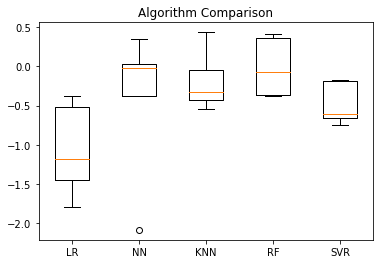

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=5)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
first_product_eda_zero_replaced_experiment = first_product_eda_zero_replaced.iloc[:78,:]

In [ ]:
first_product_eda_zero_replaced_experiment.isnull().sum().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler


xy = first_product_eda_zero_replaced_experiment.values

# Standardizing 
xy = StandardScaler().fit_transform(xy)

x_stan = np.array(pd.DataFrame(xy).iloc[:,:-1])

y_stan = np.array(pd.DataFrame(xy).iloc[:,-1])
#y_stan = pd.DataFrame(y_stan).columns = ['y']

In [ ]:
pd.DataFrame(x_stan)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
0,0.202034,-0.161747,-0.016791,-0.197693,-0.233903,-0.284635,-0.068831,3.114211,0.835024,-0.864103,-0.326319,-0.295450,1.111871,5.638054,-0.312811,-0.438254,-0.521334,2.281238,-0.423447,-0.171652,-0.543033,-1.320285,-0.267055,-0.245194,-0.389556,-0.355432,-0.281874,1.105669,-0.389672,-0.240671,-0.179740,0.899645,-0.398526,-0.214944,-0.397164,-0.392631,-0.481021,-0.278971,-0.510739,-0.209448,...,0.489095,0.879842,-0.178196,0.196736,1.088832,-0.345365,-0.344321,-0.216693,-0.648497,-0.224702,-0.477954,-0.303528,-0.364885,-0.275451,-0.420698,-0.770452,-0.385947,-0.324183,-0.391406,-0.466163,-0.440005,-0.264076,-0.023096,-0.382670,-0.466907,-0.477203,-0.331414,-0.460829,-1.304469,-0.187407,-0.356263,-0.248482,-0.463569,-0.192514,-0.282778,-0.23306,0.355758,-0.319037,-0.237717,0.827445
1,-0.303157,-0.161551,-0.038424,-0.197693,-0.233903,-0.284635,-0.442731,-0.313623,-0.538058,-1.265974,-0.326319,-0.230603,-0.383616,-0.451607,5.826926,0.646453,-0.521334,2.281238,-0.485082,2.360803,1.868373,1.068907,-0.374636,-0.245194,-0.389556,-0.418880,-0.410333,-0.345443,-0.389672,-0.240671,-0.179740,0.899645,-0.398526,-0.214944,-0.397164,-0.402070,-0.442016,-0.278971,-0.510739,-0.199294,...,-0.237248,0.879842,-0.249200,-0.269687,-0.371079,-0.345365,-0.344321,-0.216693,-0.648497,-0.224702,-0.477954,-0.303528,-0.364885,-0.275451,-0.420698,-1.366811,-0.385947,-0.324183,-0.391406,-0.444099,-0.435623,-0.264076,-0.023096,-0.379771,-0.453977,-0.477203,-0.316191,-0.376262,-1.231691,-0.187407,0.875474,-0.263582,-0.425523,-0.294356,-0.316231,-0.23306,0.159189,-0.299463,-0.360956,-0.281032
2,-0.303157,-0.161747,-0.165814,-0.085131,-0.296973,-0.284635,0.259828,-0.156466,0.023421,-1.201123,-0.326319,-0.244968,-0.174303,-0.334949,3.652106,1.478968,-0.521334,1.587965,-1.220005,-0.184834,1.139944,-0.330176,0.069298,1.410111,-0.295354,4.003438,-0.289190,-0.138101,5.890790,1.197767,-0.179740,0.899645,-0.444364,2.731067,2.150400,-0.381799,-0.371672,-0.278971,-0.510739,-0.205770,...,-0.237248,0.879842,-0.255334,-0.285660,-0.408277,-0.336852,-0.279277,-0.216693,-0.648497,-0.211504,-0.336410,-0.311833,-0.255094,-0.212562,2.014137,-1.243996,1.089172,0.284524,-0.263735,-0.464524,-0.436021,-0.264076,-0.023096,-0.382609,-0.464764,-0.442064,-0.275006,-0.421941,-0.810417,-0.187407,-0.345875,-0.203073,-0.484357,-0.357441,-0.336371,-0.23306,0.060711,-0.321625,-0.363891,0.702363
3,-0.303157,-0.161747,-0.165814,-0.193860,-0.360044,-0.284635,-0.374964,-0.339582,-0.561133,-0.638711,-0.326319,-0.225275,-0.393424,-0.451607,-0.472924,-0.549143,-0.521334,0.894692,-0.358207,-0.430708,-0.543033,-0.192098,-0.465534,-0.245194,-0.201153,-0.400207,-0.370102,-0.378997,2.772759,0.443924,-0.179740,0.492930,-0.437511,1.250856,0.876618,-0.361528,-0.301328,-0.278971,-0.510739,-0.212246,...,-0.237248,0.879842,-0.263158,1.066640,-0.212260,-0.348485,-0.102715,-0.216693,-0.456703,-0.043009,-0.407569,4.380924,-0.317918,-0.251880,-0.420698,-0.609121,-0.418303,-0.138024,-0.360364,-0.379743,-0.395348,-0.264076,-0.023096,-0.327847,-0.546026,-0.287429,-0.179062,-0.288683,-1.407222,-0.187407,1.644876,-0.278964,-0.492136,-0.384790,-0.364064,-0.23306,0.259425,-0.038346,-0.384478,-0.443400
4,-0.303157,-0.161747,-0.165814,-0.197693,-0.423115,-0.198192,3.942588,-0.305091,-0.517203,-1.309768,0.310609,0.457249,-0.385280,1.402015,-0.449551,-0.542490,-0.521334,0.201419,-0.479888,-0.407824,-0.543033,-0.287918,3.369326,0.330566,-0.106952,-1.648606,2.070673,3.744587,-0.345273,-0.309918,-0.179740,0.086215,-0.430657,-0.229355,-0.397164,-0.418142,-0.492315,-0.278971,-0.505353,-0.197773,...,-0.237248,0.606189,-0.252423,-0.300211,-0.371079,-0.293046,-0.357302,-0.216693,-0.281040,-0.223680,-0.292974,-0.208589,0.062825,-0.124193,1.660687,-1.351698,2.073570,-0.303764,-0.487579,-0.399

In [ ]:
#set size to 20
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x_stan)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.838242,1.840418,-1.345021,-3.038205,0.766540,-0.870479,-1.014115,1.940029,4.245761,-2.342110,-2.668877,-1.037959,-0.995451,1.196290,-0.244664,-2.203183,-2.034301,-1.644090,0.581724,-1.632010
1,-0.599759,-2.687571,-2.079010,-1.234591,-0.283711,-0.572273,-0.110042,0.353982,1.695127,2.939071,-0.969846,-0.582808,-0.362965,-1.126926,-1.256120,0.432325,-1.088929,0.627352,0.486446,-1.626223
2,1.902204,-2.804143,-3.416988,0.645612,-0.008329,2.857702,-1.604795,0.630404,3.241053,2.520734,-0.618048,-2.225426,-0.974865,-0.892265,-3.014721,1.056198,0.906306,0.281788,-2.873628,0.240659
3,-0.295290,-1.253603,-3.277573,-2.411045,-0.039370,-0.049453,-2.275463,0.201777,2.421707,-1.174755,0.507569,-0.449063,-0.933204,0.671147,-0.332659,-1.054427,1.598379,-0.247847,0.453425,0.582040
4,-4.738199,3.759389,-2.212829,3.566235,4.323338,1.977612,2.592058,0.606452,6.602516,-3.578289,-0.041305,-1.180196,1.235243,3.127918,1.218435,0.111999,-1.823837,-1.323082,1.487297,-0.853903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-1.961997,0.571942,-2.453843,-2.747507,1.678761,-2.226563,-3.254649,1.182537,2.353695,-2.613673,0.591466,0.869262,-2.333417,1.491656,4.765232,-2.591506,-1.866843,0.433761,-1.973284,0.319774
74,-0.256200,0.172444,0.067414,-0.445707,4.379427,-2.723691,-0.634752,-0.247690,-0.376307,-1.019256,-1.193317,-1.273309,-1.546198,-2.078939,1.927372,-1.258862,-0.794761,-1.342783,-0.337725,-0.069835
75,-1.183079,1.767666,-1.004643,4.312638,6.931877,-1.454069,4.462249,2.802361,-0.113786,-2.581127,-0.038948,-2.982851,4.534911,-3.701069,0.497434,0.787435,0.947269,-0.291833,-1.402090,-1.751004
76,1.353062,-0.670866,3.469505,1.096309,-0.208964,-3.040874,0.016002,0.283245,0.812039,-0.525001,-0.759634,-1.264446,2.829383,-2.445882,-0.415491,-0.892022,-0.339516,1.864013,-2.416098,0.420525


In [ ]:
#joined target variable


final_1 = pd.concat([principalDf, pd.DataFrame(y_stan).reset_index()], axis = 1)
final_2 = final_1.drop('index', axis=1)
final_3 = final_2.set_axis([*final_2.columns[:-1], 'y'], axis=1, inplace=False)

final_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,y
0,-0.838242,1.840418,-1.345021,-3.038205,0.766540,-0.870479,-1.014115,1.940029,4.245761,-2.342110,-2.668877,-1.037959,-0.995451,1.196290,-0.244664,-2.203183,-2.034301,-1.644090,0.581724,-1.632010,-0.688142
1,-0.599759,-2.687571,-2.079010,-1.234591,-0.283711,-0.572273,-0.110042,0.353982,1.695127,2.939071,-0.969846,-0.582808,-0.362965,-1.126926,-1.256120,0.432325,-1.088929,0.627352,0.486446,-1.626223,-1.493538
2,1.902204,-2.804143,-3.416988,0.645612,-0.008329,2.857702,-1.604795,0.630404,3.241053,2.520734,-0.618048,-2.225426,-0.974865,-0.892265,-3.014721,1.056198,0.906306,0.281788,-2.873628,0.240659,1.371762
3,-0.295290,-1.253603,-3.277573,-2.411045,-0.039370,-0.049453,-2.275463,0.201777,2.421707,-1.174755,0.507569,-0.449063,-0.933204,0.671147,-0.332659,-1.054427,1.598379,-0.247847,0.453425,0.582040,0.104373
4,-4.738199,3.759389,-2.212829,3.566235,4.323338,1.977612,2.592058,0.606452,6.602516,-3.578289,-0.041305,-1.180196,1.235243,3.127918,1.218435,0.111999,-1.823837,-1.323082,1.487297,-0.853903,-1.464645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-1.961997,0.571942,-2.453843,-2.747507,1.678761,-2.226563,-3.254649,1.182537,2.353695,-2.613673,0.591466,0.869262,-2.333417,1.491656,4.765232,-2.591506,-1.866843,0.433761,-1.973284,0.319774,-1.137948
74,-0.256200,0.172444,0.067414,-0.445707,4.379427,-2.723691,-0.634752,-0.247690,-0.376307,-1.019256,-1.193317,-1.273309,-1.546198,-2.078939,1.927372,-1.258862,-0.794761,-1.342783,-0.337725,-0.069835,1.035483
75,-1.183079,1.767666,-1.004643,4.312638,6.931877,-1.454069,4.462249,2.802361,-0.113786,-2.581127,-0.038948,-2.982851,4.534911,-3.701069,0.497434,0.787435,0.947269,-0.291833,-1.402090,-1.751004,0.903556
76,1.353062,-0.670866,3.469505,1.096309,-0.208964,-3.040874,0.016002,0.283245,0.812039,-0.525001,-0.759634,-1.264446,2.829383,-2.445882,-0.415491,-0.892022,-0.339516,1.864013,-2.416098,0.420525,1.162247


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = sm.tools.add_constant(final_3)
#X2 = sm.tools.add_constant(pr683_after)

# create a series bor both

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)
#series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index = X2.columns)

# display the series

print('Data before')
print('-'*100)
display(series_before)

print('Data after')
print('-'*100)
#display(series_after)

Data before
----------------------------------------------------------------------------------------------------


const    1.000000
0        1.130369
1        1.087317
2        1.196423
3        1.087446
4        1.057210
5        1.156965
6        1.164009
7        1.126456
8        1.012637
9        1.083828
10       1.009785
11       1.035544
12       1.013301
13       1.042060
14       1.000097
15       1.043834
16       1.003906
17       1.056594
18       1.000124
19       1.172865
y        2.480770
dtype: float64

Data after
----------------------------------------------------------------------------------------------------


In [ ]:
first_product_eda_zero_replaced_experiment2 = first_product_eda_zero_replaced.iloc[:78,:]

In [ ]:
first_product_eda_zero_replaced_experiment2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.793085,0.000001,0.690346,0.000001,362.021309,6.711943,502.893893,10235.637780,1221.445737,3190.003651,0.000001,-28.651684,1980.637239,136.621699,299.643323,133.973307,246.870966,674.974996,4.369916,265.896065,0.000001,-7.009597,196.752932,0.000001,91.252133,4.434880,144.889458,58.435359,138.650804,267.946614,0.000001,1349.949992,3.807971,214.180266,0.000001,56.519402,13.202909,0.000001,20.315637,0.964511,...,1419.233414,15.623353,954.519173,34.305793,43.852976,29.679820,0.000001,0.254988,0.000001,7.979666,0.373967,43.736220,58.752857,0.000001,2935.746468,2.596695,100.947424,0.000001,1.860910,5.634960,0.000001,186.568241,0.252966,2.374128,0.000001,22.850259,114.651122,2483.197938,379.732640,0.053509,120.669814,0.955509,616.883023,200.144478,0.000001,20.391554,0.509713,216.851245,56.139906,1430.314968
2012-02-01,0.000001,0.000686,0.590133,0.000001,362.021309,6.711943,72.833160,88.793012,31.360328,2650.403762,0.000001,0.000001,15.162247,0.000001,11722.413830,1440.290962,246.870966,674.974996,-0.402117,2791.911439,36.794284,182.522388,94.165604,0.000001,91.252133,0.000001,30.849195,1.320652,138.650804,267.946614,0.000001,1349.949992,3.807971,214.180266,0.000001,37.871432,57.424344,0.000001,20.315637,3.337018,...,1419.233414,2.122137,59.032868,0.000001,43.852976,29.679820,0.000001,0.254988,0.000001,7.979666,0.373967,43.736220,58.752857,0.000001,2269.404233,2.596695,100.947424,0.000001,72.223545,13.151133,0.000001,186.568241,0.519628,20.318062,0.000001,85.488369,210.179587,2588.661911,379.732640,112.074386,69.943189,2.704237,292.934714,138.241134,0.000001,15.316564,2.526962,39.451960,7.172635,0.000001
2012-03-01,0.000001,0.000001,0.000001,0.672651,311.558651,6.711943,880.917406,553.998042,518.008231,2737.479632,0.000001,-6.347258,290.256466,2.617234,7676.235559,2442.891474,246.870966,506.231247,-57.303368,252.747505,25.679593,71.534699,517.492658,1.587617,130.891729,309.109919,138.394545,9.481479,11213.037290,2880.581924,0.000001,1349.949992,-0.804235,5583.822878,73.588569,77.919465,137.175562,0.000001,20.315637,1.823901,...,1419.233414,0.955845,28.366982,-0.874112,80.014693,171.031154,0.000001,0.254988,3.202027,174.340068,0.000001,265.141758,224.155363,1.380692,2406.631651,179.212511,736.932691,4.502811,7.086171,12.468490,0.000001,186.568241,0.258555,5.347865,0.983134,254.959894,158.579070,3199.137392,379.732640,0.998247,273.213135,0.000001,92.264811,100.972356,0.000001,12.774053,0.242973,35.226264,50.614383,5088.531900
2012-04-01,0.000001,0.000001,0.000001,0.022906,261.095993,6.711943,150.778812,11.951856,11.360498,3492.642102,0.000001,2.353750,2.272131,0.000001,1.760293,0.429605,246.870966,337.487498,9.421156,7.498595,0.000001,82.488252,7.487167,0.000001,170.531325,1.305207,66.564346,0.000001,5714.988383,1511.377797,0.000001,901.163836,-0.114656,2885.868757,36.794284,117.967497,216.926780,0.000001,20.315637,0.310783,...,1419.233414,-0.531863,2624.647300,3.732019,30.601114,554.727287,0.000001,127.210261,44.081898,90.704564,211.316371,138.450364,120.745031,0.000001,3116.009696,-1.277284,295.448919,1.094817,277.454230,82.241088,0.000001,186.568241,5.296067,-107.428215,5.309581,649.753667,309.110417,2334.295931,379.732640,182.047997,18.272077,-0.357520,5.272196,49.725924,0.000001,17.904427,29.437773,5.591309,0.000001,2837.756051
2012-05-01,0.000001,0.000001,0.000001,0.000001,210.633335,167.945052,5116.833341,114.048014,49.435797,2591.599732,475.080939,303.912998,12.975439,41.586061,45.244724,8.442525,246.870966,168.743749,0.000001,30.324494,0.000001,74.886927,3664.337211,0.552216,210.170921,-85.955052,2233.384744,16